# CNN

In [33]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms

In [2]:
MNIST = datasets.MNIST(
    r'C:\Users\Usuario\Desktop\datasets_pytorch',
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

In [3]:
dados, rotulo = [],[]
for mn in MNIST:
    dados.append(mn[0])
    rotulo.append(mn[1])
print(type(dados[0]))
print(type(rotulo[0]))

<class 'torch.Tensor'>
<class 'int'>


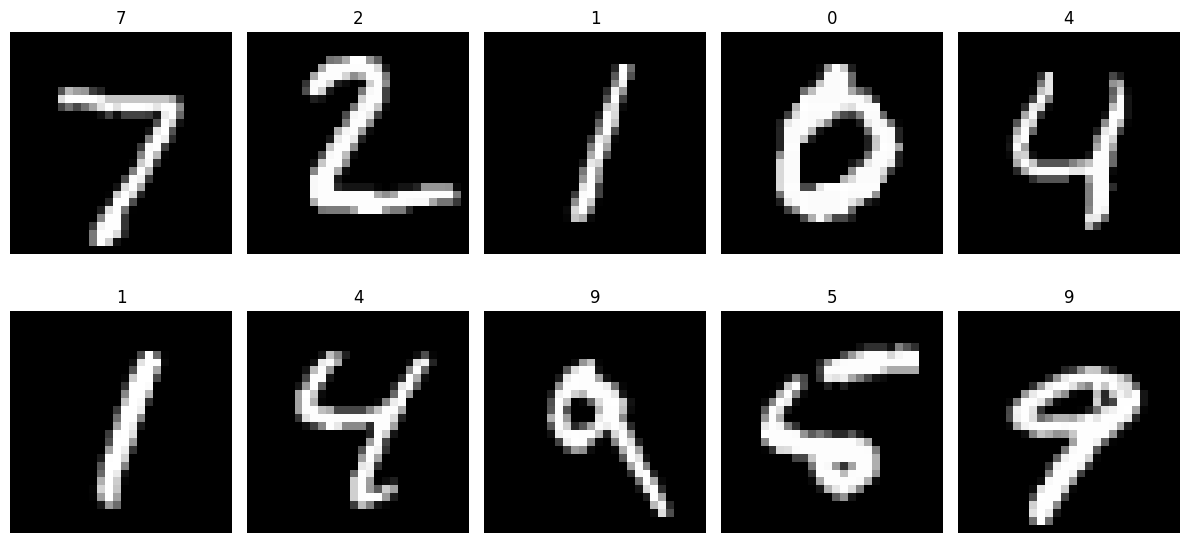

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # Cria uma grade 2x5
axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

for i in range(10):
    axes[i].imshow(dados[i][0], cmap='gray')  # Ajuste 'cmap' conforme necessário
    axes[i].set_title(rotulo[i])
    axes[i].axis('off')  # Remove os eixos para melhor visualização

plt.tight_layout()
plt.show()

# DETECÇÃO

In [5]:
VOC = datasets.VOCDetection(
    r'C:\Users\Usuario\Desktop\datasets_pytorch',
    image_set='train',
    download=False,
    transform=transforms.ToTensor()
)

In [6]:
dado,rotulo = VOC[0]
dado = dado.permute(1,2,0)
print(type(dado), dado.size())
print(type(rotulo))
rotulo

<class 'torch.Tensor'> torch.Size([442, 500, 3])
<class 'dict'>


{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

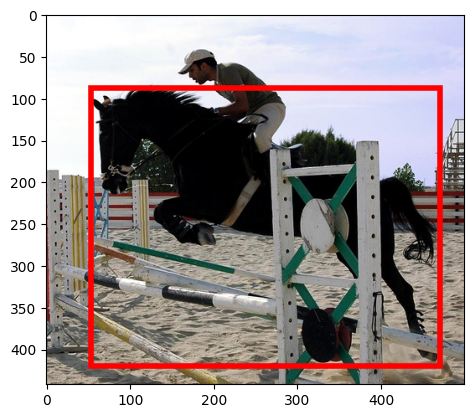

In [7]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots()
ax.imshow(dado)
ax.add_patch(patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=4, edgecolor='r', facecolor='none'))
plt.show()

# SEGMENTACAO

In [8]:
VOC = datasets.VOCSegmentation(
    r'C:\Users\Usuario\Desktop\datasets_pytorch',
    image_set='train',
    download=False,
    transform=transforms.ToTensor(),
    target_transform=transforms.ToTensor()
)

In [9]:
dado,rotulo = VOC[0]
dado = dado.permute(1,2,0)
print(type(dado), dado.size())
print(type(rotulo))
rotulo

<class 'torch.Tensor'> torch.Size([281, 500, 3])
<class 'torch.Tensor'>


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

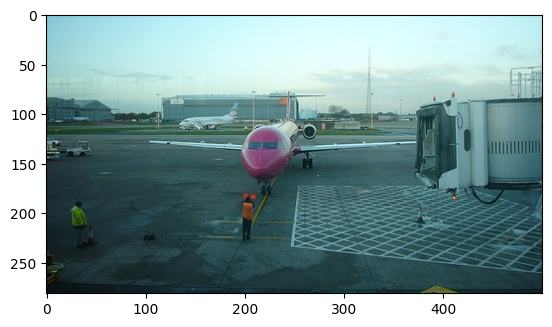

In [10]:
# bbox = rotulo['annotation']['object'][0]['bndbox']
# xmax = int(bbox['xmax'])
# xmin = int(bbox['xmin'])
# ymax = int(bbox['ymax'])
# ymin = int(bbox['ymin'])

fig, ax = plt.subplots()
ax.imshow(dado)
# ax.add_patch(patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=4, edgecolor='r', facecolor='none'))
plt.show()

# CONVOLUCAO 1D

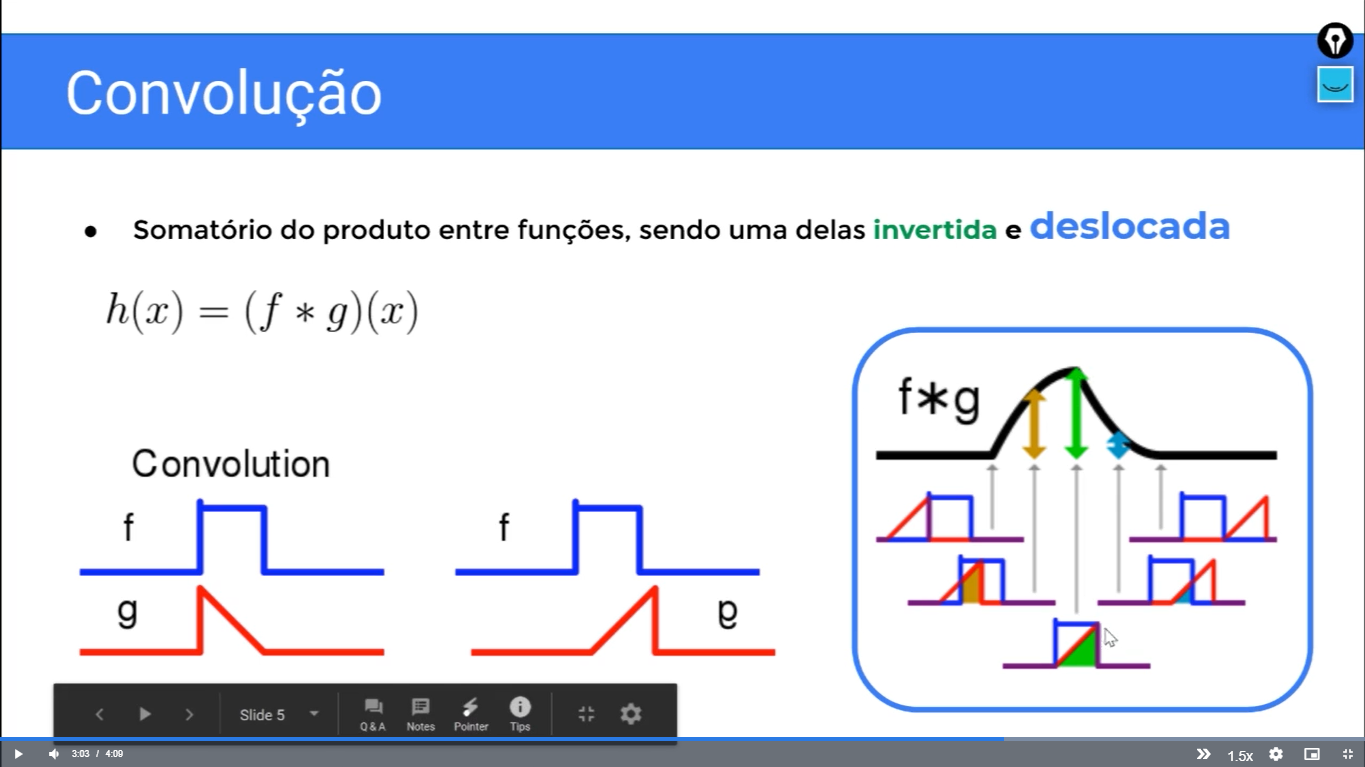

In [11]:
from scipy.signal import convolve

In [12]:
x = np.linspace(0,100,100)
y = 10*np.sin(x)*np.random.rand(x.shape[0])

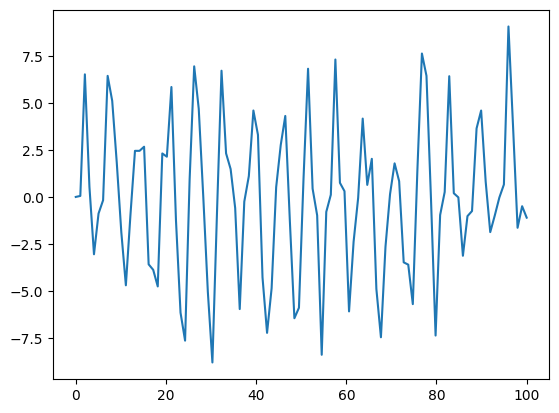

In [13]:
plt.plot(x,y)

In [14]:
def show(valores, title):
  plt.figure(figsize=(len(valores),2))
  plt.imshow(valores[np.newaxis,:],cmap='gray')
  for k,s in enumerate(valores):
    try:
      plt.text(k,0,f'{s:.3}', fontsize=16,color='red',ha='center',va='center')
    except:
      plt.text(k,0,f'{s}', fontsize=16,color='red',ha='center',va='center')
  plt.title(title,fontsize=18)
  plt.yticks()

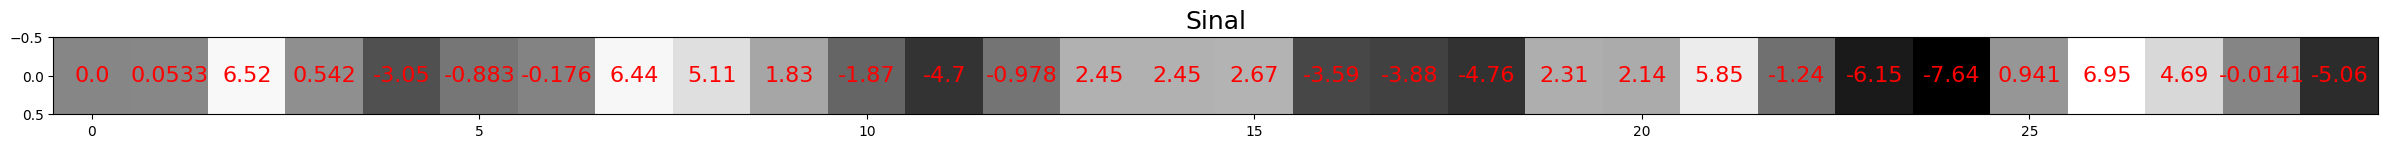

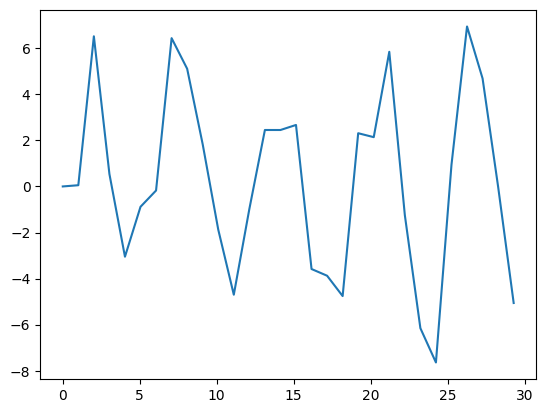

In [15]:
entrada = x[:30]
sinal = y[:30]

show(sinal,'Sinal')
plt.figure()
plt.plot(entrada,sinal)

## kernel | filtro

In [16]:
kernel = np.asarray([1,0,-1])
kernel

array([ 1,  0, -1])

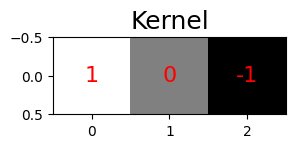

In [17]:
show(kernel,'Kernel')

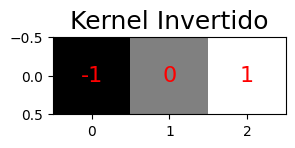

In [18]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido,'Kernel Invertido')

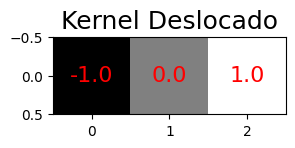

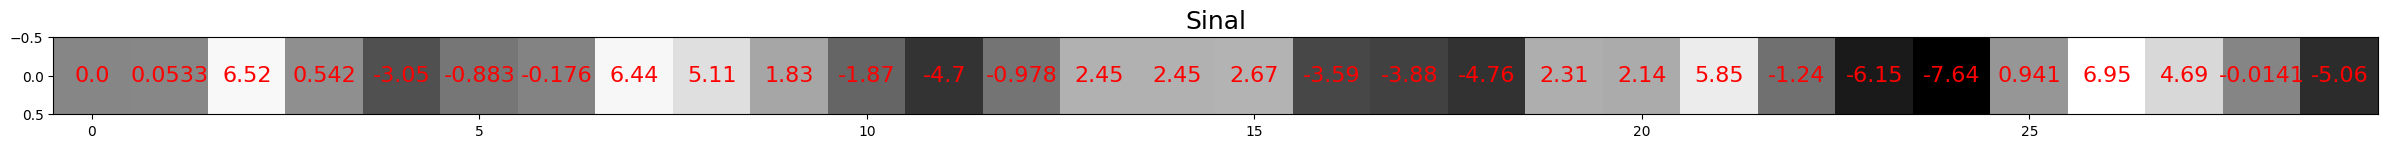

In [19]:
# deslocar

u=0
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack((deslocamento,kernel_invertido))
show(kernel_deslocado,'Kernel Deslocado')
show(sinal, 'Sinal')

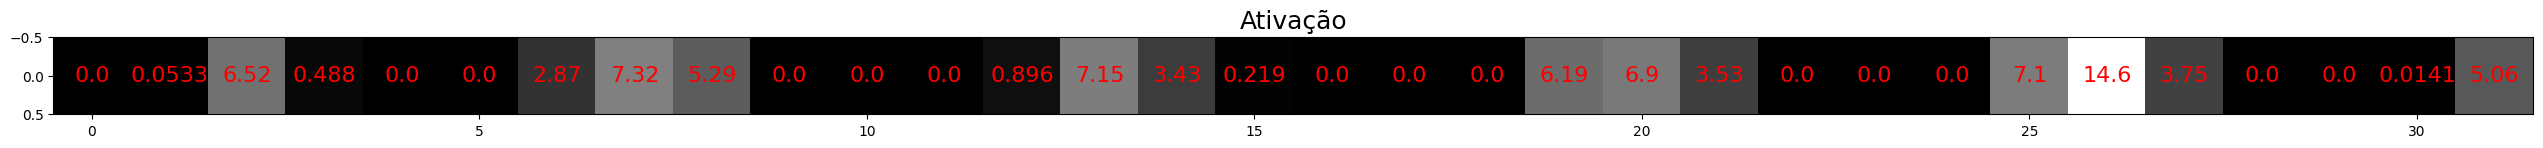

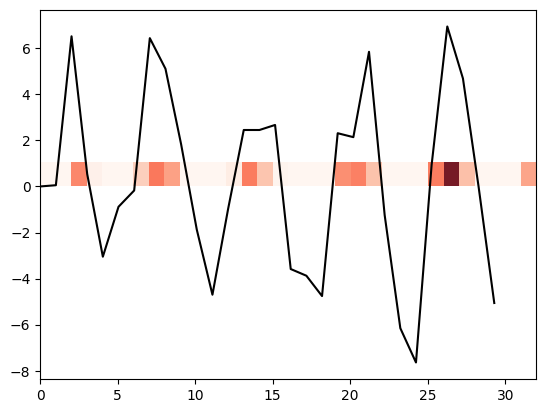

In [20]:
ativacao = convolve(sinal,kernel)
ativacao[ativacao<0]=0
show(ativacao,'Ativação')
plt.figure()
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.9, extent=[0, len(ativacao), 0, 1])
plt.plot(entrada, sinal, color='black')

# CONVOLUCAO 2D

In [21]:
from skimage import data as skdata
from skimage import io,color,transform

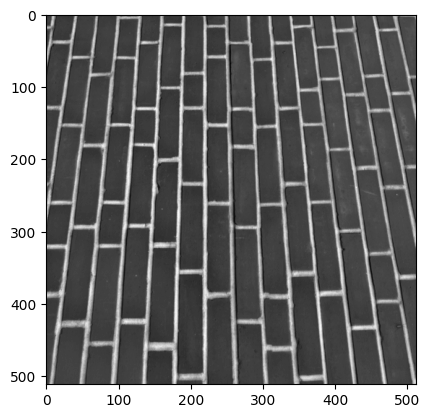

In [22]:
img = skdata.brick()
plt.imshow(img,cmap='gray')

In [23]:
kernel_v = np.asarray(
    [
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
    ]
)
kernel_h = np.asarray(
    [
        [1,1,1],
        [0,0,0],
        [-1,-1,-1]
    ]
)

In [24]:
map_v=convolve(img,kernel_v,mode='valid')
map_h=convolve(img,kernel_h,mode='valid')

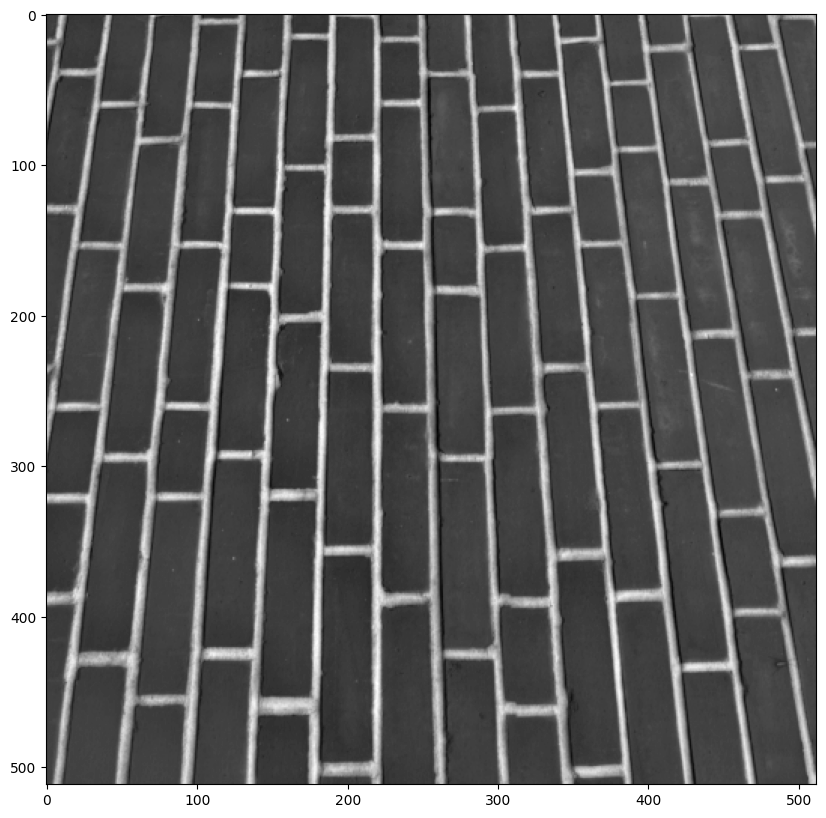

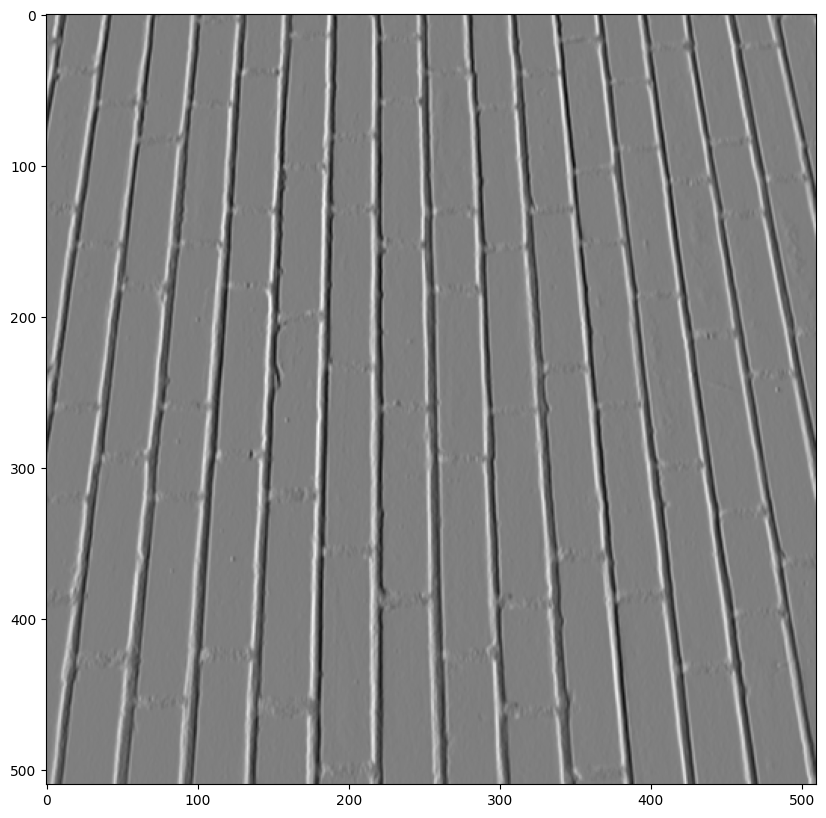

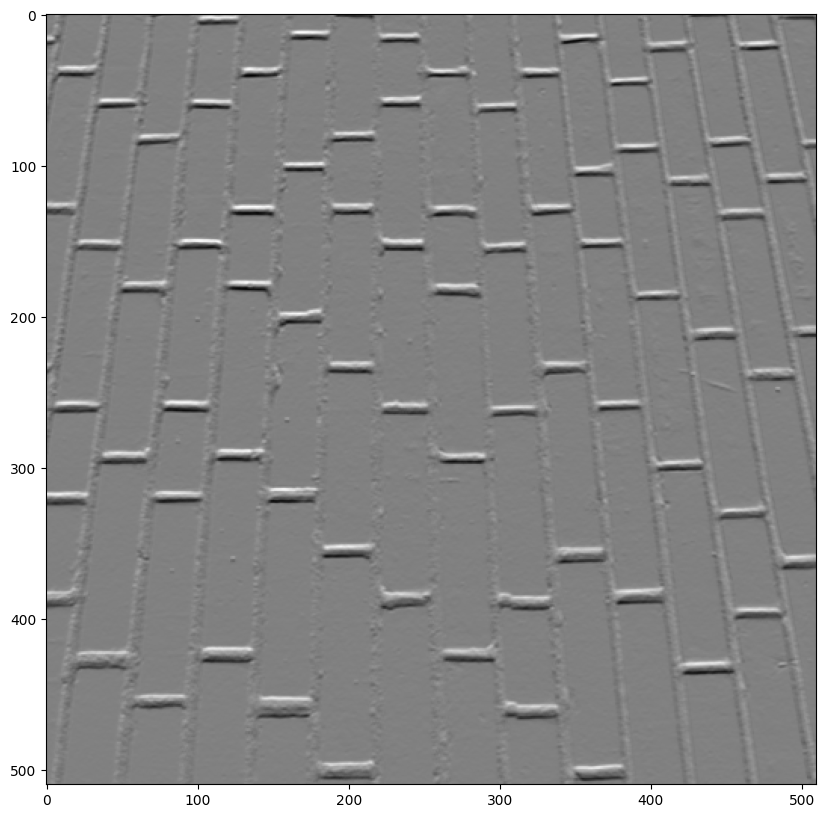

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(map_v,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(map_h,cmap='gray')

## FILTROS CONVOLUCIONAIS

In [26]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

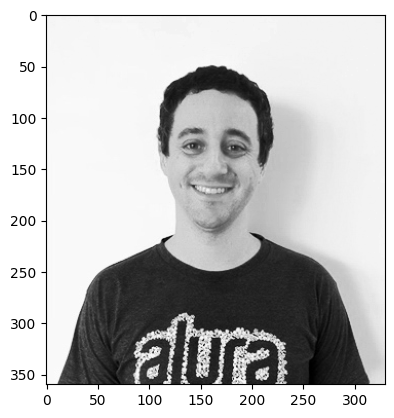

In [29]:
img = io.imread('https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

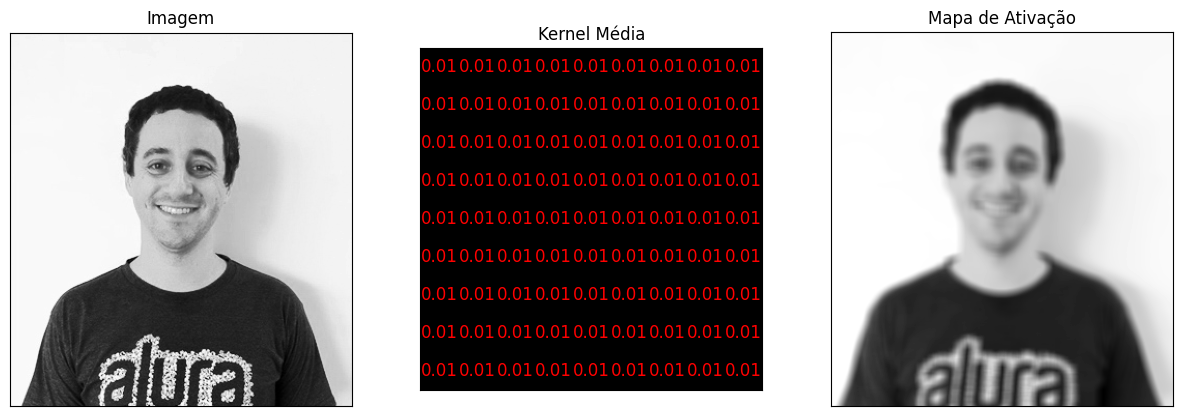

In [30]:
##### MEAN
# reference https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(9**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


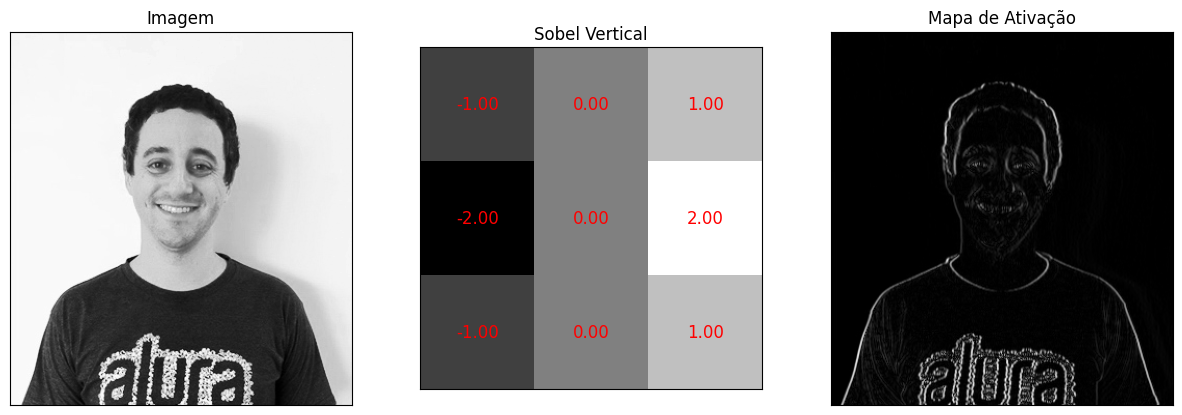

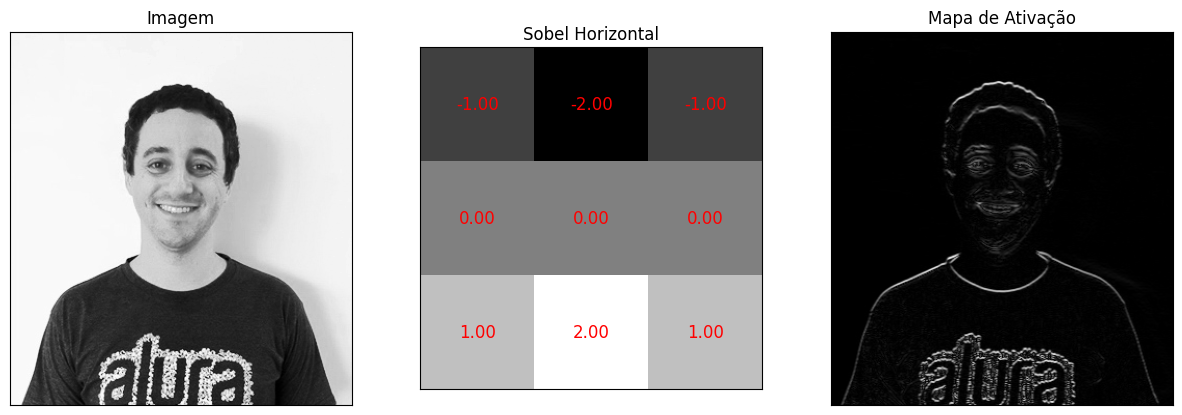

In [31]:
# reference: https://pt.wikipedia.org/wiki/Filtro_Sobel

##### SOBEL VERTICAL
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]
# print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')


##### SOBEL HORIZONTAL
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]
print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')


[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


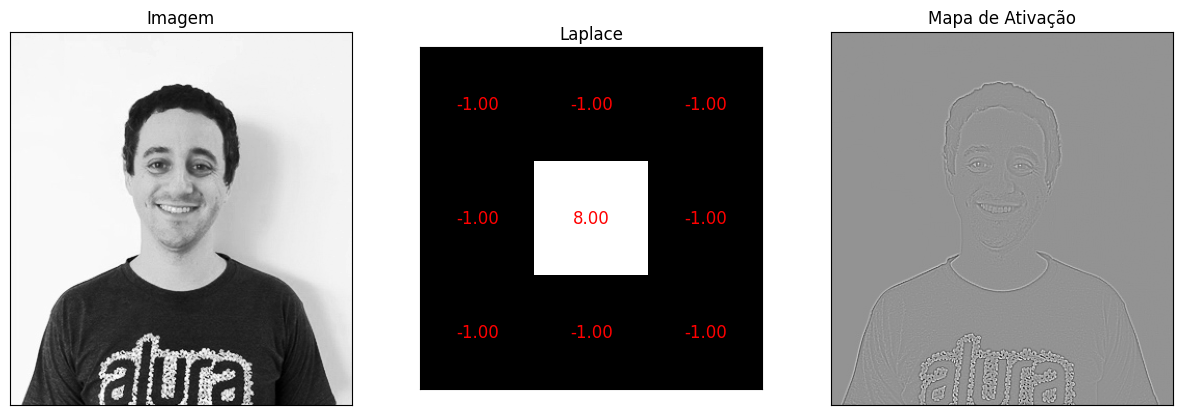

In [32]:
##### LAPLACE
#reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, --resultado, 'Laplace')

# CAMADA CONVOLUCIONAL

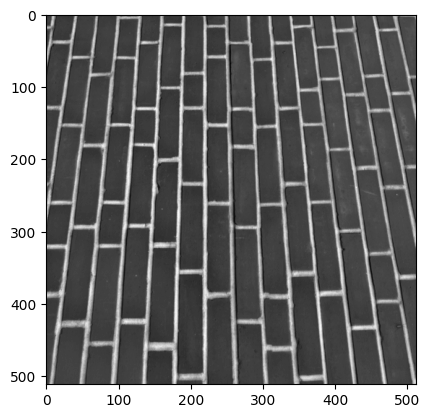

In [35]:
img = skdata.brick()
plt.imshow(img, cmap='gray')

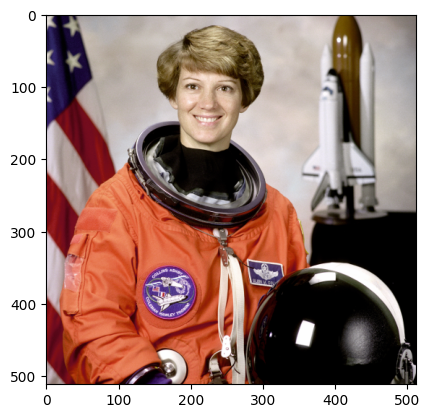

In [37]:
img_rgb = skdata.astronaut()
plt.imshow(img_rgb)

In [51]:
conv = nn.Conv2d(
    in_channels=1,
    out_channels=16,
    kernel_size=3,
    stride=1,
    padding=1
)
conv_rgb = nn.Conv2d(
    in_channels=3,
    out_channels=16,
    kernel_size=3,
    stride=1,
    padding=1
)

In [40]:
print(img.shape)
print(img_rgb.shape)

(512, 512)
(512, 512, 3)


In [49]:
img_tns = torch.Tensor(img).view(1,1,img.shape[0],img.shape[1])
img_rgb_tns = torch.Tensor(img_rgb).permute(2,0,1).unsqueeze(0)

In [47]:
ativacao_img = conv(img_tns)
ativacao_img.size()

torch.Size([1, 16, 512, 512])

In [52]:
ativacao_img_rgb = conv_rgb(img_rgb_tns)
ativacao_img_rgb.size()

torch.Size([1, 16, 512, 512])

## POOLING

In [59]:
pool = nn.MaxPool2d(kernel_size=2,stride=2)

In [60]:
saida = pool(ativacao_img)
saida.size()

torch.Size([1, 16, 256, 256])

## BATCH NORMALIZATION

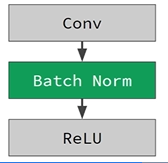

In [61]:
blococonv = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
)
blococonv

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [62]:
print(img_rgb_tns.size())
saida = blococonv(img_rgb_tns)
print(saida.size())

torch.Size([1, 3, 512, 512])
torch.Size([1, 32, 256, 256])
